# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [34]:
# Your code here. 
import pandas as pd
import numpy as np

student_data = pd.DataFrame({'Student ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Student ID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


In [35]:
student_data.set_index('Student ID', inplace=True)
student_data

,Age,Tardies
Student ID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


In [36]:
student_data

,Age,Tardies
Student ID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

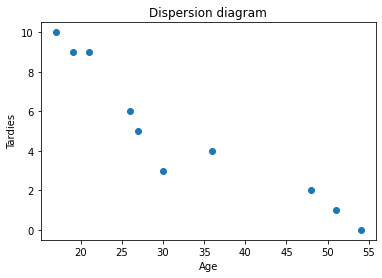

In [37]:
# Your code here.
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Dispersion diagram')
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
The older the students are, the less tardies they get.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [38]:
# Your response here.
student_data.corr()
# correlation of -0.93 which means that variables are strongly linked

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [40]:
np.cov(student_data['Age'], student_data['Tardies'])
# Cov of -45.6, which means that when age age increases, tardives decrease

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [48]:
# Your response here.
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print('The R2 is: ' + str(r_value**2))
print('The p-value is: ' + str(p_value))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768
The R2 is: 0.8820265558250108
The p-value is: 5.56665383455343e-05


Plot your regression model on your scatter plot.

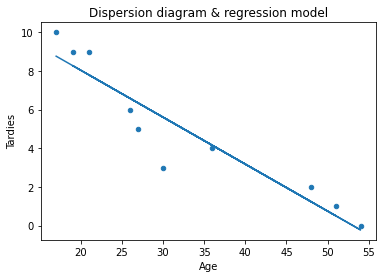

In [45]:
# Your code here.
student_data.plot.scatter(x='Age', y='Tardies')
plt.plot(student_data.Age, slope * student_data.Age + intercept)
plt.title('Dispersion diagram & regression model')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
# Import any libraries you may need & the data
vehicles=pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_2\Lab_16_Linear-Regression\vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [55]:
vehicles.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [58]:
vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550
...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100
35948,2014,3.0,9.155833,36,1100
35949,2015,3.0,9.155833,36,1100
35950,2016,3.0,9.155833,36,1100


In [59]:
vehicles[vehicles.columns[1:]].corr()['CO2 Emission Grams/Mile'][:]

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [60]:
# Your response here. 
indep_variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
dep_variable = ['CO2 Emission Grams/Mile']
all_variables = indep_variables + dep_variable

vehicles_subset = vehicles[all_variables]
vehicles_subset.corr()[dep_variable]

,CO2 Emission Grams/Mile
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865
CO2 Emission Grams/Mile,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [76]:
import statsmodels.api as sm
X = sm.add_constant(vehicles[['Year', 'Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
Y = vehicles['CO2 Emission Grams/Mile']

model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)
results.params

C:\Users\Administrateur\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                769.888284
Year                  -0.320617
Cylinders              1.878800
Fuel Barrels/Year     19.052925
Combined MPG          -3.040399
Fuel Cost/Year         0.032309
dtype: float64

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [75]:
# Your response here. 
print_pred=results.summary()
print(print_pred)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                             19:20:41   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [77]:
# Your code here. 
parties=pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

Text(0.5, 1.0, 'Parties')

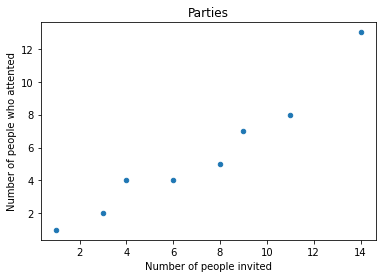

In [81]:
# Your code here.
parties.plot.scatter(x='X', y='Y')
plt.xlabel('Number of people invited')
plt.ylabel('Number of people who attented')
plt.title('Parties')

In [83]:
X = parties['X']
Y = parties['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print('The R2 is: ' + str(r_value**2))
print('The p-value is: ' + str(p_value))

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945
The R2 is: 0.9316696375519905
The p-value is: 0.00010236374464090686


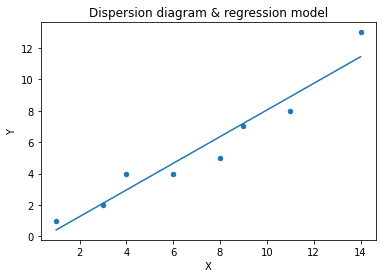

In [84]:
parties.plot.scatter(x='X', y='Y')
plt.plot(parties.X, slope * parties.X + intercept)
plt.title('Dispersion diagram & regression model')
plt.show()

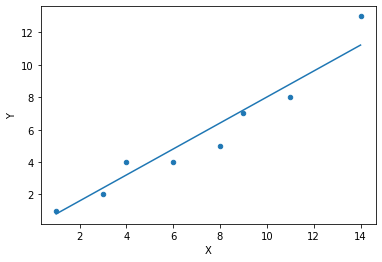

In [86]:
parties.plot.scatter(x = 'X', y = 'Y')
model = sm.OLS(parties.Y, parties.X).fit()
results = model.params
plt.plot(parties.X, results.X * parties.X)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [87]:
# Your response here. 
print_model = model.summary()
print(print_model)
# We see that the regression line looks quite close to the observations, except the last one.
# Most of the observations points are below the regression line due to the outlier.
# Also, the slope is positive, i.e. the more people I invite, the more people come, which is logical.
# However, the slopes seems less than 1, so the more people I invite, the less come (but stable in proportion).

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                    4.20e-07
Time:                        19:31:51   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Administrateur\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 